### Aula 1: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [3]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados da IBM:

**a)** Faça um gráfico de dispersão (scatter plot) com a variável *YearsAtCompany* no eixo X e a variável *DailyRate* no eixo Y. Coloque o título "YearsAtCompany x DailyRate" e determine o tamanho da imagem como (10,5).

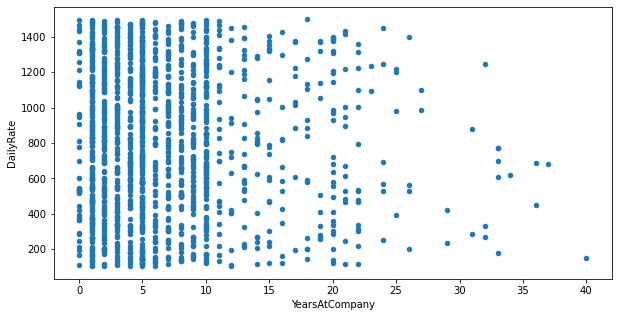

In [4]:
df1.plot(x='YearsAtCompany', y='DailyRate', kind='scatter', figsize=(10, 5))

plt.show()

**b)** Repita o gráfico do item a, identificando as observações do gênero feminino com a cor vermelha e do gênero masculino com a cor verde. Não esqueça de inserir legenda para as cores.

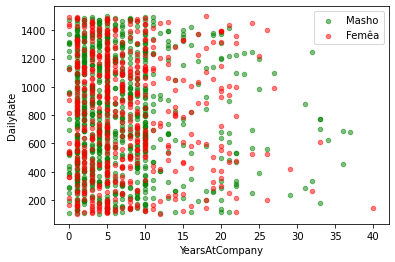

In [6]:
ax1 = df1[df1['Gender'] == 'Male'].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', 
                                        color='green', alpha=.5, label='Masho')
ax2 = df1[df1['Gender'] == 'Female'].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', 
                                          color='red', alpha=.5, ax=ax1, label='Femêa')

plt.show()

**c)** Repita o gráfico do item a, porém agora identificando os funcionários pela variável 'JobSatisfaction', 
utilizando a seguinte escala de cores:
- cor: '#FFE4E1' para 'Low' 
- cor: '#FFB6C1' para 'Medium' 
- cor: '#FF69B4' para 'High' 
- cor: '#C71585' para 'Very High' 

In [8]:
cores = {'Low': '#FFE4E1',
         'Medium':  '#FFB6C1',
         'High': '#FF69B4',
         'Very High': '#C71585'}

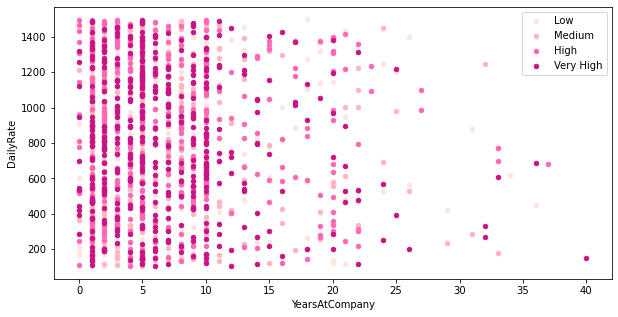

In [9]:
ax1 = df1[df1['JobSatisfaction'] == 1].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', 
                                            c=cores['Low'], figsize=(10,5), label='Low')
ax2 = df1[df1['JobSatisfaction'] == 2].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', 
                                            c=cores['Medium'], label='Medium', ax=ax1)
ax3 = df1[df1['JobSatisfaction'] == 3].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', 
                                            c=cores['High'], label='High', ax = ax1)
ax4 = df1[df1['JobSatisfaction'] == 4].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', 
                                            c=cores['Very High'], label='Very High', ax=ax1)

plt.legend()
plt.show()

**d)** Observando os gráficos desenhados, você diria que o tempo na empresa, o gênero e/ou a satisfação no trabalho tem relação com o gasto diário com o colaborador?

    • Não me parece haver relação entre o gasto diário e as variáveis mencionadas a partir da observação dos 
    gráficos produzidos

## Exercício 2

**a)** Utilizando a base de dados de covid, crie um gráfico de linhas mostrando a evolução do número de casos novos mês a mês, para as DRS 'Grande São Paulo', 'São José do Rio Preto' e 'Marília'. Identifique os DRS por cores e legenda. Não esqueça de colocar título para o gráfico e para os eixos. 

In [10]:
df2 = df2.rename(columns={'ano_mes': 'mês'})
df2 = df2.replace({'2020-02': 'fevereiro', '2020-03': 'março', '2020-04': 'abril', '2020-05': 'maio', '2020-06': 'junho'})

In [11]:
dfg = df2.groupby(['nome_drs', 'mês'], as_index=False).sum()

[]

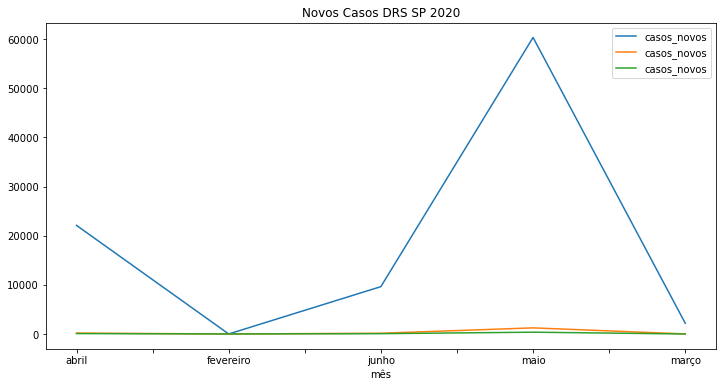

In [12]:
ax1 = dfg[dfg['nome_drs'] == 'Grande São Paulo'].plot(x='mês', y='casos_novos', figsize=(12,6))
ax2 = dfg[dfg['nome_drs'] == 'São José do Rio Preto'].plot(x='mês', y='casos_novos', ax=ax1)
ax3 = dfg[dfg['nome_drs'] == 'Marília'].plot(x='mês', y='casos_novos', ax=ax1)

ax1.set_title('Novos Casos DRS SP 2020')
plt.plot()

**b)** Repita o gráfico do item a trocando as cores dos DRS.

[]

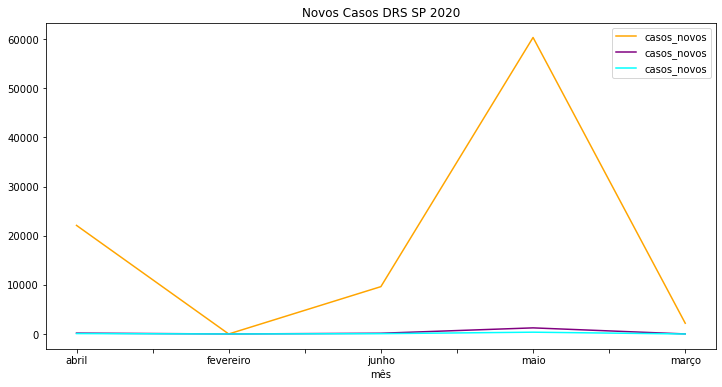

In [13]:
ax1 = dfg[dfg['nome_drs'] == 'Grande São Paulo'].plot(x='mês', y='casos_novos', c='orange', figsize=(12,6))
ax2 = dfg[dfg['nome_drs'] == 'São José do Rio Preto'].plot(x='mês', y='casos_novos', c='purple', ax=ax1)
ax3 = dfg[dfg['nome_drs'] == 'Marília'].plot(x='mês', y='casos_novos', c='cyan', ax=ax1)

ax1.set_title('Novos Casos DRS SP 2020')
plt.plot()

**c)** Considerando apenas os DRS 'Bauru', 'São José do Rio Preto' e 'Marília', faça três gráficos de pizza, para os meses de abril, maio e junho, mostrando a porcentagem de novos óbitos em cada DRS.

In [14]:
dfg_trim = dfg[(dfg['mês'] == 'abril') | (dfg['mês'] == 'maio') | (dfg['mês'] == 'junho')]

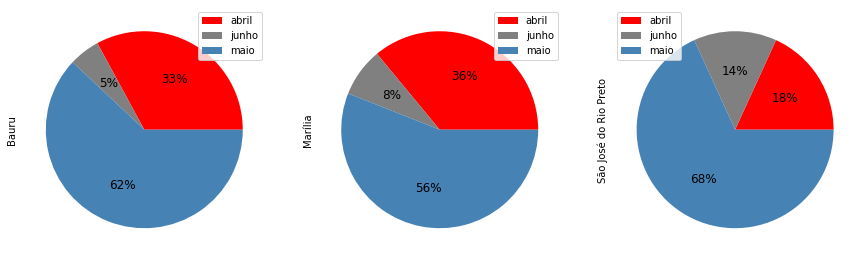

In [42]:
pizza = dfg_trim[(dfg_trim['nome_drs'] == 'Bauru') | 
         (dfg_trim['nome_drs'] == 'São José do Rio Preto') |
         (dfg_trim['nome_drs'] == 'Marília')
        ].pivot(index='mês', columns='nome_drs', values='obitos_novos')
pizza.plot(kind='pie', subplots=True, figsize=(15,12), autopct='%1.0f%%',
           fontsize=12, labeldistance=None, colors=['red',  'gray', 'steelblue'])
plt.show()